## download the data 

In [144]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt


In [145]:
df=pd.read_csv('/Users/xinyuanliang/Desktop/midterm_data.csv')
df.head(20)

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
0,1,62,3,13.295129,2,20,199.21,0,Desktop,Location 1
1,2,65,2,21.686405,3,21,294.82,0,Desktop,Location 3
2,3,18,7,17.135220,4,23,240.87,0,Desktop,Location 4
3,4,21,9,29.589311,8,16,183.78,1,Desktop,Location 2
4,5,21,3,25.948584,4,10,59.51,1,Tablet,Location 4
5,6,57,9,36.061679,9,16,195.40,1,Desktop,Location 5
6,7,27,2,6.259057,1,14,116.28,0,Mobile,Location 2
7,8,37,8,28.509460,7,16,118.14,1,Desktop,Location 1
8,9,39,5,21.073814,7,25,175.00,0,Tablet,Location 1
9,10,54,5,28.689260,6,22,196.29,0,Desktop,Location 2


# Data cleaning process

### How did you prepare your data for analysis? Describe your data cleaning and preparation approaches, and why these were the best choices.

Importing the Data: The data was imported using the pandas library, and the DataFrame was created.

Initial Data Exploration: Descriptive statistics (df.describe()) and data information (df.info()) were used to get an overview of the dataset, including the number of columns, data types, and summary statistics.

Data Visualization: Data visualization techniques were used to gain insights into the distribution and potential outliers in the 'time_spent' variable. A histogram (sns.histplot()) and a boxplot (sns.boxplot()) were created to visualize the distribution and identify any potential outliers.

Identifying and Handling Outliers: An outlier was identified in the 'time_spent' variable based on its maximum value. The outlier was considered an anomaly and was removed from the dataset using the drop() function. The same process was repeated for other identified outliers.

Handling Missing Values: The presence of missing values in the 'device' and 'location' columns was checked using isnull().sum(). To handle missing values, the 'device' column was filled with the value 'Unknown' using the fillna() method. Similarly, the 'location' column was filled with 'Unknown' to replace missing values. This choice was made because there is no information available to impute missing values, and assigning a unique category ('Unknown') allows for the inclusion of these records in subsequent analysis.

Final Check for Missing Values: After handling missing values, a final check was performed using isnull().sum() to ensure that no missing values remained in the dataset.

In [146]:
df.describe()

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,41.538200,5.027200,25.158496,5.774400,14.966400,149.443146,0.272400
std,1443.520003,14.042734,2.594958,9.825536,2.570842,6.046336,68.711683,0.445239
min,1.000000,18.000000,1.000000,1.000000,1.000000,5.000000,20.410000,0.000000
25%,1250.750000,29.000000,3.000000,18.268862,4.000000,10.000000,92.482500,0.000000
50%,2500.500000,42.000000,5.000000,25.035361,6.000000,15.000000,143.440000,0.000000
75%,3750.250000,54.000000,7.000000,32.000361,8.000000,20.000000,198.380000,1.000000
max,5000.000000,65.000000,9.000000,90.000000,12.000000,25.000000,427.400000,1.000000


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userID           5000 non-null   int64  
 1   age              5000 non-null   int64  
 2   sessions         5000 non-null   int64  
 3   time_spent       5000 non-null   float64
 4   pages_visited    5000 non-null   int64  
 5   cart_items       5000 non-null   int64  
 6   cart_value       5000 non-null   float64
 7   checkout_status  5000 non-null   int64  
 8   device           4900 non-null   object 
 9   location         4970 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 390.8+ KB


<Axes: xlabel='time_spent', ylabel='Count'>

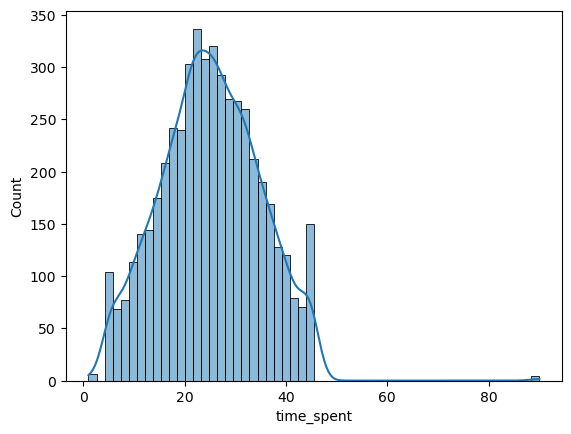

In [148]:
sns.histplot(df['time_spent'], kde=True)

<Axes: >

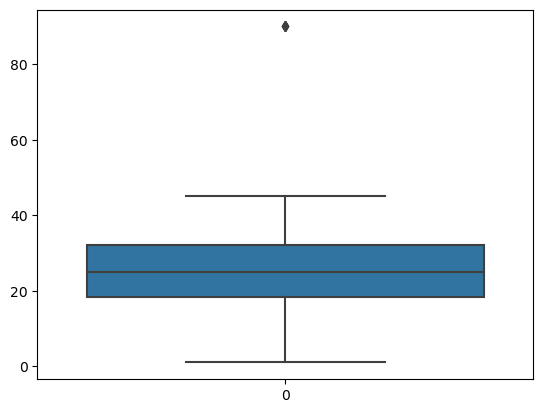

In [149]:
sns.boxplot(df['time_spent'])

In [150]:
# write a statement to filter the data set and identify the outlier
df[df['time_spent'] == df['time_spent'].max()]

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
284,285,47,5,90.0,12,14,148.45,0,Desktop,Location 4
2494,2495,28,2,90.0,12,18,151.35,0,Desktop,Location 1
2833,2834,30,8,90.0,12,7,88.32,0,Desktop,Location 1
3957,3958,19,1,90.0,12,20,228.70,0,Desktop,Location 4


In [151]:
# drop the outlier
df.drop(284, axis=0, inplace=True )
df.drop(2494, axis=0, inplace=True )
df.drop(2833, axis=0, inplace=True )
df.drop(3957, axis=0, inplace=True )

<Axes: >

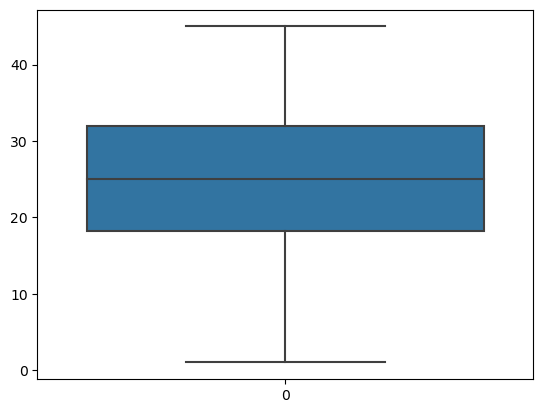

In [152]:
sns.boxplot(df['time_spent'])

In [153]:
# find the missing values
df.isnull().sum()

userID               0
age                  0
sessions             0
time_spent           0
pages_visited        0
cart_items           0
cart_value           0
checkout_status      0
device             100
location            30
dtype: int64

There a 100 missing value in device, 30 in location

In [154]:
# Handling missing values in the 'device' column
df['device'].fillna('Unknown', inplace=True)

# Handling missing values in the 'location' column
df['location'].fillna('Unknown', inplace=True)

missing_values_after_cleaning = df.isnull().sum()
print(missing_values_after_cleaning)

userID             0
age                0
sessions           0
time_spent         0
pages_visited      0
cart_items         0
cart_value         0
checkout_status    0
device             0
location           0
dtype: int64


In [155]:
# Calculate the checkout rate
checkout_rate = df['checkout_status'].mean()
print(checkout_rate)


0.27261809447558044


now we make sure the checkout rate is 27.24%, less than 30%

## Analysis the data 

In [156]:
# Analyze characteristics of users who check out
checkout_users = df[df['checkout_status'] == 1]



In [157]:
# Analyze characteristics of users who do not check out
no_checkout_users = df[df['checkout_status'] == 0]




In [168]:
# Calculate average age for checkout and no checkout users
checkout_age = checkout_users['age'].mean()
no_checkout_age = no_checkout_users['age'].mean()
print('check out users average age:', checkout_age)
print('non check out users average age:', no_checkout_age)



check out users average age: 41.32599118942731
non check out users average age: 41.629334067143645


In [169]:
#  Calculate average number of pages visited for checkout and no checkout users
checkout_pages = checkout_users['pages_visited'].mean()
no_checkout_pages = no_checkout_users['pages_visited'].mean()
print('check out users average pages visited:', checkout_pages)
print('non check out users average pages visited:', no_checkout_pages)


check out users average pages visited: 7.2878120411160054
non check out users average pages visited: 5.200330214639516


In [160]:
#  Calculate average time spent on website for checkout and no checkout users
checkout_time = checkout_users['time_spent'].mean()
no_checkout_time = no_checkout_users['time_spent'].mean()
print('check out users average time spent on website:', checkout_time)
print('non check out users average time spent on website:', no_checkout_time)



check out users average time spent on website: 31.317918168193827
non check out users average time spent on website: 22.778612179365165


In [170]:
#  calculate average cart value for checkout and no checkout users
checkout_cart = checkout_users['cart_value'].mean()
no_checkout_cart = no_checkout_users['cart_value'].mean()
print('check out users average cart value:', checkout_cart)
print('non check out users average cart value:', no_checkout_cart)


check out users average cart value: 140.82421439060207
non check out users average cart value: 152.66822509631263


In [162]:
#  calculate average number of items in cart for checkout and no checkout users
checkout_items = checkout_users['cart_items'].mean()
no_checkout_items = no_checkout_users['cart_items'].mean()

print('check out users average items in cart:', checkout_items)
print('non check out users average items in cart:', no_checkout_items)


check out users average items in cart: 14.120411160058737
non check out users average items in cart: 15.283709411117226


In [194]:
# Calculate the checkout rate for each device type
checkout_rate_by_device = df.groupby('device')['checkout_status'].mean().sort_values(ascending=False)
print(checkout_rate_by_device)

device
Desktop    0.285714
Mobile     0.264706
Tablet     0.254818
Unknown    0.220000
Name: checkout_status, dtype: float64


In [164]:
# Calculate the checkout rate for each device type
checkout_rate_by_device = df.groupby('location')['checkout_status'].mean().sort_values(ascending=False)
print(checkout_rate_by_device)

location
Location 4    0.284630
Location 1    0.283521
Location 5    0.266735
Unknown       0.266667
Location 2    0.266316
Location 3    0.261341
Name: checkout_status, dtype: float64


we can see that user in location 4 and use desktop have the highest checkout rate

### Based on your analysis, what can you conclude about the behaviour or characteristics of users who complete check out vs those who do not?

 Age: There is no significant difference in the average age between users who completed checkout and those who did not. Age does not appear to be a determining factor in completing the checkout process.

 Pages Visited: Users who completed checkout tend to visit more pages compared to those who did not check out. This suggests that higher engagement with the website, exploring more pages, and potentially finding desired products or information contribute to higher checkout rates.

 Time Spent on Website: Users who completed checkout spend, on average, more time on the website compared to non-checkout users. This indicates that a longer browsing duration may lead to increased interest, product consideration, and ultimately, higher conversion rates.

 Cart Value: Users who completed checkout have a higher average cart value compared to non-checkout users. This suggests that users who complete the checkout process are willing to spend more on their purchases, indicating a stronger intent to make a purchase.

 Cart Items: Users who completed checkout have, on average, a higher number of items in their cart compared to non-checkout users. This implies that users who proceed to checkout tend to add more items to their carts, indicating a higher level of purchase intent and potentially a greater willingness to complete the purchase.

 Device and Location: There are variations in the checkout rate among different device types and locations. Desktop users and users from specific locations, such as Location 4, have higher checkout rates. This implies that device preference and geographic location may influence the likelihood of completing a purchase, highlighting the importance of tailored marketing strategies and optimized user experiences based on device and location.


## T test

In [188]:
checkout_ages = df[df['checkout_status'] == 1]['age']
non_checkout_ages = df[df['checkout_status'] == 0]['age']

# Perform the t-test
t_statistic, p_value = stats.ttest_ind(checkout_ages, non_checkout_ages)

# Print the results
print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: -0.6798968886129201
p-value: 0.49660126593756404


there is no significant difference in the average age between users who completed checkout and those who did not.

In [189]:
checkout_pages = df[df['checkout_status'] == 1]['pages_visited']
non_checkout_pages = df[df['checkout_status'] == 0]['pages_visited']

# Perform the t-test

t_statistic, p_value = stats.ttest_ind(checkout_pages, non_checkout_pages)

# Print the results
print("t-statistic:", t_statistic)
print("p-value:", p_value)


t-statistic: 27.47146951327662
p-value: 7.534979639566005e-155


With a t-statistic of 27.47 and a p-value of 7.53e-155 (essentially 0). These results suggest that there is a significant difference in the average age between users who completed checkout and those who did not.

In [190]:
checkout_time = df[df['checkout_status'] == 1]['time_spent']
non_checkout_time = df[df['checkout_status'] == 0]['time_spent']

# Perform the t-test

t_statistic, p_value = stats.ttest_ind(checkout_time, non_checkout_time)

# Print the results
print("t-statistic:", t_statistic)
print("p-value:", p_value)


t-statistic: 30.277770149978465
p-value: 4.9270409264476604e-185


There is a significant difference

In [191]:
checkout_cart = df[df['checkout_status'] == 1]['cart_value']
non_checkout_cart = df[df['checkout_status'] == 0]['cart_value']

# Perform the t-test

t_statistic, p_value = stats.ttest_ind(checkout_cart, non_checkout_cart)

# Print the results

print("t-statistic:", t_statistic)
print("p-value:", p_value)


t-statistic: -5.43996238583549
p-value: 5.5833035815279226e-08


there is a statistically significant difference in the "cart_value" between the two groups based on their "checkout_status."

In [192]:
checkout_items = df[df['checkout_status'] == 1]['cart_items']
non_checkout_items = df[df['checkout_status'] == 0]['cart_items']

# Perform the t-test

t_statistic, p_value = stats.ttest_ind(checkout_items, non_checkout_items)

# Print the results

print("t-statistic:", t_statistic)
print("p-value:", p_value)


t-statistic: -6.076710953091002
p-value: 1.3177377698990114e-09


there is a statistically significant difference in the "cart_items" between the two groups based on their "checkout_status."

## Q3
 What recommendations do you have for the product team? What should they do next? Be specific (i.e., who should they target, why and how).

In the analysis we can see that users who visit more pages tend to have a higher checkout rate. 

(check out users average pages visited: 7.28, non check out users average pages visited: 5.2)


Therefore, product teams should focus on engaging users and encouraging them to visit more pages on the site. This can be achieved through personalized recommendations, improved navigation and enticing content. Equally the longer the browsing time, the higher the user's checkout rate

Also desktop users have higher checkout rates compared to mobile and tablet users. Product teams should invest in optimizing the site experience for desktop users.

there is not much difference of check out users and non checkout average items in cart, 
(check out users average items in cart: 14.12, non check out users average items in cart: 15.28)
So the project team can implement retargeting strategies to reach users who have abandoned their shopping carts. Use email alerts or targeted ads to remind users of their abandoned items and offer rewards to encourage them to return and complete the checkout process.

Users from Location 4 had the highest checkout rates. The product team should analyze the reasons behind this success and identify strategies to replicate it elsewhere. This may involve customizing marketing campaigns, providing localized content, or offering specific incentives for users in other locations.

While t-tests did not show a significant difference in average age between checkout and non-checkout users, it is worth considering marketing and promotional campaigns that target younger age groups. Younger users may have different preferences and shopping habits, so understanding their needs and adapting marketing efforts accordingly may increase conversion rates.

Next, the project team can implement A/B testing to assess the impact of potential changes and improvements. This will allow the product team to measure the effectiveness of different strategies in increasing checkout rates.